# Column Transformer

Theres a great deal of transformation that needs to be performed before we can feed the data to our models. Scikit Learn's Column transformer streamlines the process and makes it easier to deal with datasets that contains both numerical and categorical data.

In [37]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
url = 'https://raw.githubusercontent.com/amueller/ml-training-advanced/master/notebooks/data/bike_day_raw.csv'
bike = pd.read_csv(url)

In [4]:
bike.dtypes

season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [47]:
bike_data = bike.drop('cnt', axis =1)

# Getting the categorical feature names
cat_features = bike.columns[:6]
cat_features

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], dtype='object')

In [7]:
bike_data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


**make_column_transformer** allows us to split and decided what we want to do to both numerical and categorical

In [55]:
# performing transformation on both numerical and categorical
ct = make_column_transformer((OneHotEncoder(sparse=False), cat_features),
                             (StandardScaler(), [6,7,8,9]))

# if you don't want to do anything to the numerical columns and want to keep them as it is
ct = make_column_transformer((OneHotEncoder(sparse=False), cat_features),
                             remainder = 'passthrough')


To show what transformer was used on what column.

    * onehotencoder was performed on ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
    * remainder is basically whats remaining, which is our numerical column

In [56]:
ct.fit(bike_data)
ct.transformers_

[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
         dtype=<class 'numpy.float64'>, handle_unknown='error',
         n_values=None, sparse=False), Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], dtype='object')),
 ('remainder', 'passthrough', [6, 7, 8, 9])]

In [57]:
ct.transform(bike_data).shape

(731, 34)

If you want to use ColumnTransformer...the main difference between *ColumnTransformer* & *make_column_transformer* is that you need to give the process a name for the former

In [ ]:
# if you don't want to use the remainder feature
ColumnTransformer([('ohe', OneHotEncoder(sparse=False), cat_features),
                   ('scaler', StandardScaler(), [6,7,8,9])])

In [24]:
ct = make_column_transformer((OneHotEncoder(sparse=False), cat_features),
                             remainder=StandardScaler())
ohe_pipe = make_pipeline(ct, Ridge())

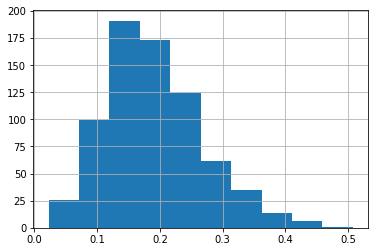

In [26]:
bike['windspeed'].hist()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(bike_data, bike.cnt, random_state=42)

**Didn't specify remainder?** No worries, fix it in param grid, and you can even experiment with different preprocessing techniques like MinMaxScaler, RobustScaler, PowerTransformer etc...

In [58]:
from sklearn.preprocessing import PowerTransformer

ct = make_column_transformer((OneHotEncoder(sparse = False),cat_features))
ohe_pipe = make_pipeline(ct, Ridge())

param_grid = {'columntransformer__remainder':[StandardScaler(), PowerTransformer(method = 'yeo-johnson')],
              'ridge__alpha': np.logspace(-3,2,6)}

grid = GridSearchCV(ohe_pipe, param_grid, cv = 5)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.544684701658323

In [59]:
grid.best_params_

{'columntransformer__remainder': StandardScaler(copy=True, with_mean=True, with_std=True),
 'ridge__alpha': 10.0}

In [35]:
res = pd.DataFrame(grid.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__remainder,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009801,0.003250,0.0042,1.166294e-03,"StandardScaler(copy=True, with_mean=True, with...",0.001,{'columntransformer__remainder': StandardScale...,0.523292,0.530999,0.610672,...,0.522892,0.067793,6,0.599843,0.599046,0.576809,0.619540,0.594319,0.597911,0.013646
1,0.007400,0.000490,0.0038,4.000425e-04,"StandardScaler(copy=True, with_mean=True, with...",0.01,{'columntransformer__remainder': StandardScale...,0.523306,0.531043,0.610661,...,0.522921,0.067770,5,0.599843,0.599045,0.576808,0.619540,0.594319,0.597911,0.013646
2,0.007600,0.001200,0.0038,7.483792e-04,"StandardScaler(copy=True, with_mean=True, with...",0.1,{'columntransformer__remainder': StandardScale...,0.523435,0.531467,0.610539,...,0.523194,0.067540,4,0.599838,0.599040,0.576803,0.619534,0.594316,0.597906,0.013646
3,0.007600,0.000490,0.0042,4.000425e-04,"StandardScaler(copy=True, with_mean=True, with...",1,{'columntransformer__remainder': StandardScale...,0.524062,0.534835,0.608799,...,0.525206,0.065591,2,0.599506,0.598696,0.576529,0.619153,0.594088,0.597594,0.013607
4,0.008000,0.001265,0.0040,1.907349e-07,"StandardScaler(copy=True, with_mean=True, with...",10,{'columntransformer__remainder': StandardScale...,0.515989,0.550924,0.594814,...,0.530660,0.058986,1,0.592839,0.591406,0.571334,0.611243,0.587161,0.590797,0.012764
5,0.007400,0.000490,0.0046,8.000732e-04,"StandardScaler(copy=True, with_mean=True, with...",100,{'columntransformer__remainder': StandardScale...,0.451963,0.547740,0.538225,...,0.502751,0.054725,11,0.545223,0.530410,0.523032,0.555750,0.525751,0.536033,0.012487
6,0.019001,0.002281,0.0042,4.000426e-04,"PowerTransformer(copy=True, method='yeo-johnso...",0.001,{'columntransformer__remainder': PowerTransfor...,0.516199,0.532617,0.595314,...,0.515880,0.066711,10,0.595318,0.591647,0.575576,0.618014,0.589681,0.594047,0.013726
7,0.017601,0.001744,0.0042,4.001856e-04,"PowerTransformer(copy=True, method='yeo-johnso...",0.01,{'columntransformer__remainder': PowerTransfor...,0.516204,0.532670,0.595368,...,0.515911,0.066730,9,0.595318,0.591646,0.575576,0.618013,0.589680,0.594047,0.013726
8,0.018001,0.001673,0.0044,4.900766e-04,"PowerTransformer(copy=True, method='yeo-johnso...",0.1,{'columntransformer__remainder': PowerTransfor...,0.516240,0.533174,0.595828,...,0.516198,0.066893,8,0.595303,0.591632,0.575550,0.618002,0.589662,0.594030,0.013731
9,0.020201,0.006400,0.0044,4.899208e-04,"PowerTransformer(copy=True, method='yeo-johnso...",1,{'columntransformer__remainder': PowerTransfor...,0.516252,0.536836,0.596867,...,0.518048,0.066991,7,0.594693,0.591016,0.574621,0.617461,0.588984,0.593355,0.013845


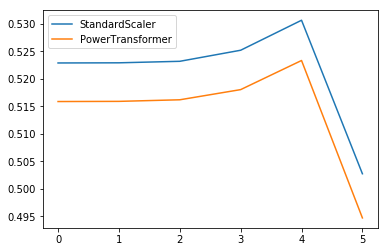

In [60]:
plt.plot(res.mean_test_score[:6].values, label="StandardScaler")
plt.plot(res.mean_test_score[6:].values, label="PowerTransformer")
plt.legend()